In [4]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sbn

In [5]:
walmart = pd.read_csv('walmart_data.csv')

In [7]:
print(f"There are {walmart.shape[0]} records and {walmart.shape[1]} features ")

There are 550068 records and 10 features 


In [9]:
print("The data type of the columns are\n")
print(walmart.dtypes)

The data type of the columns are

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


In [10]:
print("As we can see there are no null values")
walmart.isna().sum()

As we can see there are no null values


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

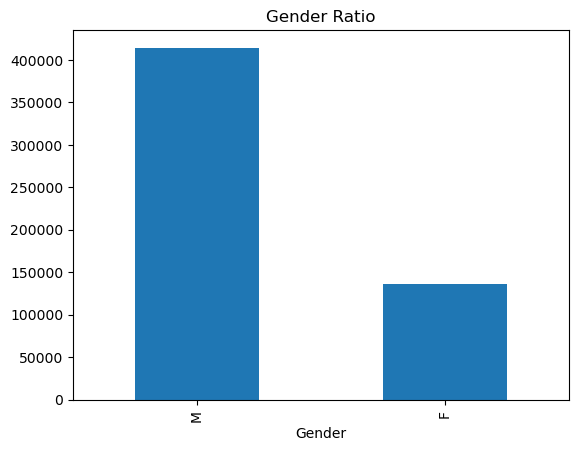

In [14]:
plt.title("Gender Ratio")
series = walmart['Gender'].value_counts()
series.plot(kind='bar')

### As we can see above the data is biased towards the male gender . It would be recommended to gather more data for the female gender

In [22]:
print("There are 7 age categories")
print(walmart['Age'].unique())
print()
print("The counts are")
print(walmart['Age'].value_counts())
print()
print("As we can see the age group (26-35) are the most frequent buyers")

There are 7 age categories
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

The counts are
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

As we can see the age group (26-35) are the most frequent buyers


In [32]:
print("The top 3 product categories with their Sales_Count are")
print()
print(walmart["Product_Category"].value_counts().iloc[:3])

The top 3 product categories with their Sales_Count are

Product_Category
5    150933
1    140378
8    113925
Name: count, dtype: int64


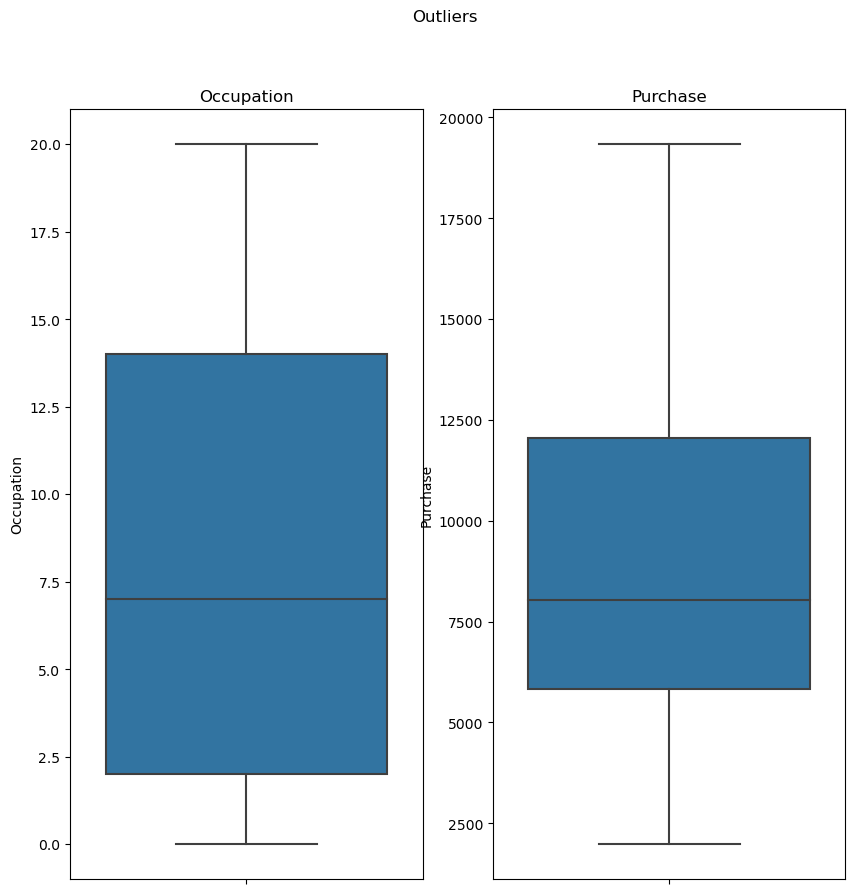

In [44]:
plt.figure(figsize=(10,10))
plt.suptitle("Outliers")
plt.subplot(1,2,1)
plt.title("Occupation")
sbn.boxplot(y="Occupation",data= walmart)



plt.subplot(1,2,2)
plt.title("Purchase")
sbn.boxplot(y="Purchase",data=walmart)

plt.show()

### Only the purchase column has outliers , so clipping that data between 5 and 95 %

In [40]:
walmart['Purchase']=np.clip(walmart['Purchase'],np.quantile(walmart['Purchase'],.05),np.quantile(walmart['Purchase'],.95))

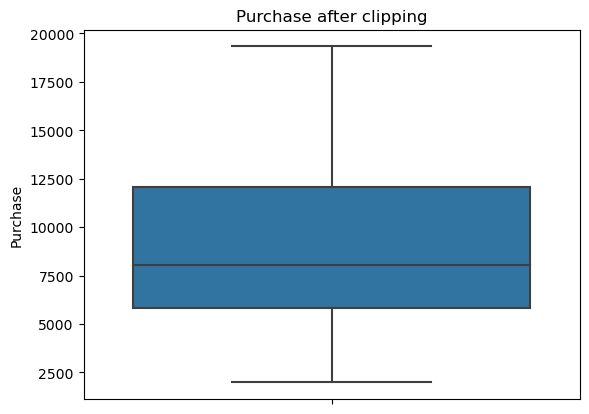

In [43]:
plt.title("Purchase after clipping")
sbn.boxplot(y="Purchase",data=walmart)
plt.show()

### As we can see the outliers have been removed 

In [84]:

age_groups = walmart.groupby('Age')
l = []
for x in age_groups.groups.keys():
    l.append(age_groups.get_group(x)["Product_Category"].mode()[0])


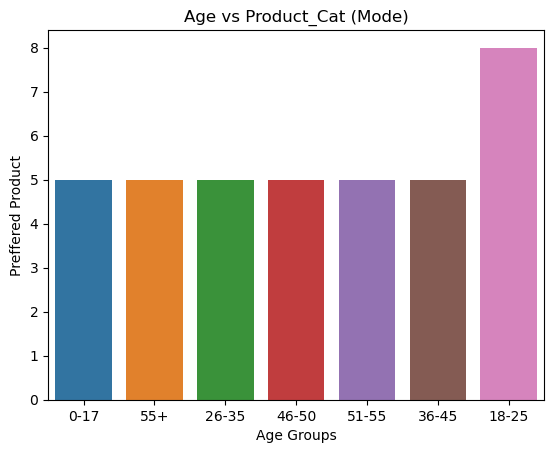

In [87]:
plt.title("Age vs Product_Cat (Mode)")
plt.xlabel("Age Groups")
plt.ylabel("Preffered Product")
sbn.barplot(x=walmart["Age"].unique(),y=l,)
plt.show()

### As we can see **product 5** is most favourable among all age groups accept 18-25 which prefer product 8 .
### Incentives should be given to the age group 18-25 for product 8 to increase sales

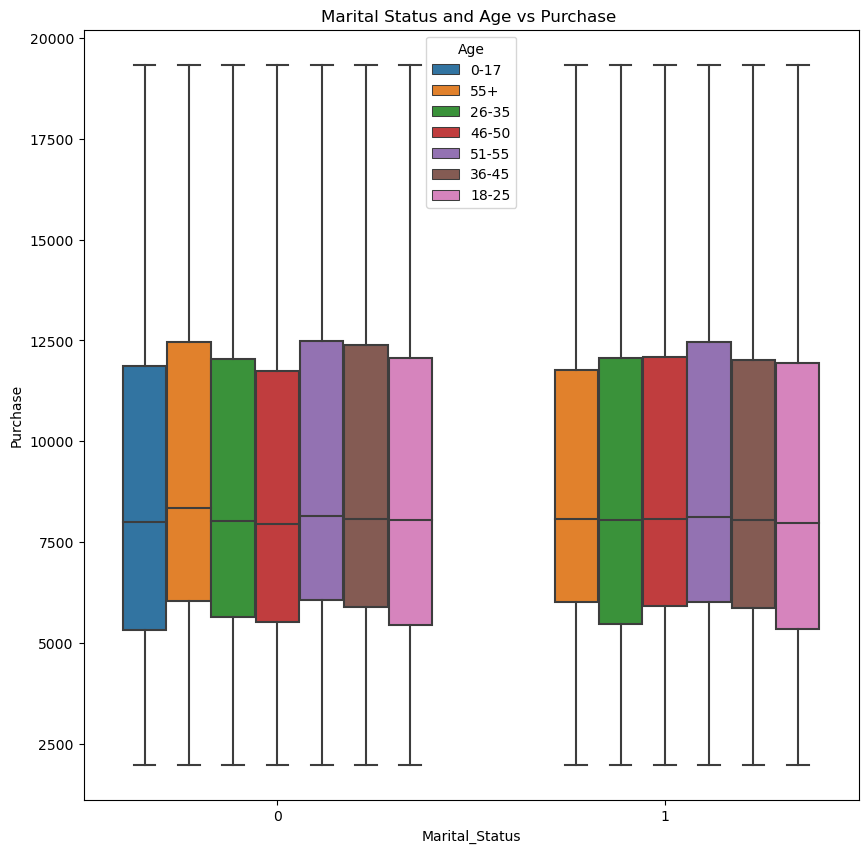

In [99]:
plt.figure(figsize=(10,10))
plt.title("Marital Status and Age vs Purchase ")
sbn.boxplot(x="Marital_Status",y="Purchase",hue="Age",data=walmart)
plt.show()

### As we can see there is no significant difference

In [102]:
gender_groups = walmart.groupby('Gender')
l = []
for x in gender_groups.groups.keys():
    l.append(gender_groups.get_group(x)["Product_Category"].mode()[0])

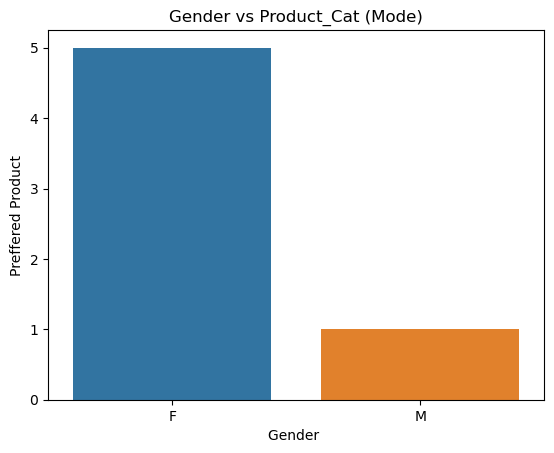

In [103]:
plt.title("Gender vs Product_Cat (Mode)")
plt.xlabel("Gender ")
plt.ylabel("Preffered Product")
sbn.barplot(x=walmart["Gender"].unique(),y=l)
plt.show()

### As we can see females prefer product 5 while males prefer product 1 

### Target marketing must be done based on gender 

## Gender vs Amount Spent (Purchase)

In [105]:
walmart_male = walmart.loc[walmart["Gender"]=='M']["Purchase"]
walmart_female = walmart.loc[walmart["Gender"]=='F']["Purchase"]


### Actual mean of the data

In [107]:
print(f"for Male it is {walmart_male.mean()}")
print(f"for Male it is {walmart_female.mean()}")

for Male it is 9427.240996574606
for Male it is 8736.540266109021


### Using CLT

In [152]:
### Defining custom CLT Func

def clt(series):
    mu = np.mean(series)
    sig = np.std(series)
    n = len(series)
    return (mu-2*(sig/(n**.5)),mu+2*(sig/(n**.5)))

In [153]:
print(f"\nFor Males - With 95% confidence interval the purchase amount is between {clt(walmart_male)}")
print()
print(f"For Females - With 95% confidence interval the purchase amount is between {clt(walmart_female)}")


For Males - With 95% confidence interval the purchase amount is between (9411.93421790756, 9442.547775241654)

For Females - With 95% confidence interval the purchase amount is between (8711.592183629518, 8761.488348588524)


### Boot starpping using 300 samples

In [131]:
bs_mean_m_300=[]
bs_mean_f_300=[]

for x in range(10000):
    bs_mean_m_300.append(sum(np.random.choice(walmart_male,300))/300)
    bs_mean_f_300.append(sum(np.random.choice(walmart_female,300))/300)
    
print("\n300 sample bootstrapping")
print()
print(f"Bootsrapped mean - Male - {sum(bs_mean_m_300)/len(bs_mean_m_300)}")
print()
print(f"Bootsrapped mean - Feale - {sum(bs_mean_f_300)/len(bs_mean_f_300)}")


300 sample bootstrapping

Bootsrapped mean - Male - 9422.522414999969

Bootsrapped mean - Feale - 8739.839803666646


### Bootstrapping using 3000 samples

In [132]:
bs_mean_m_3000=[]
bs_mean_f_3000=[]

for x in range(10000):
    bs_mean_m_3000.append(sum(np.random.choice(walmart_male,3000))/3000)
    bs_mean_f_3000.append(sum(np.random.choice(walmart_female,3000))/3000)
    
print("\n3000 sample bootstrapping")
print()
print(f"Bootsrapped mean - Male - {sum(bs_mean_m_3000)/len(bs_mean_m_3000)}")
print()
print(f"Bootsrapped mean - Feale - {sum(bs_mean_f_3000)/len(bs_mean_f_3000)}")


3000 sample bootstrapping

Bootsrapped mean - Male - 9427.804715866663

Bootsrapped mean - Feale - 8736.610884466632


In [133]:
### Bootstrapping using 30000 samples

In [134]:
bs_mean_m_30000=[]
bs_mean_f_30000=[]

for x in range(10000):
    bs_mean_m_30000.append(sum(np.random.choice(walmart_male,30000))/30000)
    bs_mean_f_30000.append(sum(np.random.choice(walmart_female,30000))/30000)
    
print("\n30000 sample bootstrapping")
print()
print(f"Bootsrapped mean - Male - {sum(bs_mean_m_30000)/len(bs_mean_m_30000)}")
print()
print(f"Bootsrapped mean - Feale - {sum(bs_mean_f_30000)/len(bs_mean_f_30000)}")


30000 sample bootstrapping

Bootsrapped mean - Male - 9427.288586436647

Bootsrapped mean - Feale - 8736.715579263338


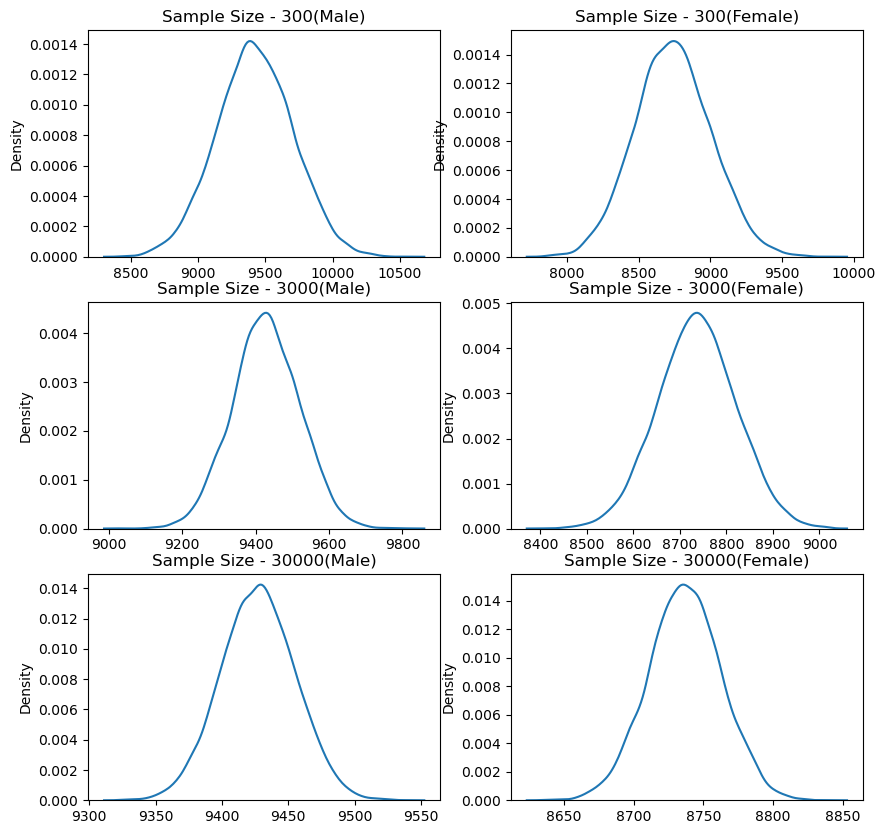

In [143]:
### Dist plot for different sample sizes

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.title("Sample Size - 300(Male)")
sbn.kdeplot(bs_mean_m_300)

plt.subplot(3,2,2)
plt.title("Sample Size - 300(Female)")
sbn.kdeplot(bs_mean_f_300)

plt.subplot(3,2,3)
plt.title("Sample Size - 3000(Male)")
sbn.kdeplot(bs_mean_m_3000)

plt.subplot(3,2,4)
plt.title("Sample Size - 3000(Female)")
sbn.kdeplot(bs_mean_f_3000)

plt.subplot(3,2,5)
plt.title("Sample Size - 30000(Male)")
sbn.kdeplot(bs_mean_m_30000)

plt.subplot(3,2,6)
plt.title("Sample Size - 30000(Female)")
sbn.kdeplot(bs_mean_f_30000)

plt.show()

### Insights

**For the entire data set the gap of confidence interval is higher for females considering the genders which explains that for females the data has more variance . Male customers are more consistent .**

**As the sample size increases the mean gets closer to the actual value and the distribution of means is closer to the normal distribution**

**yes the confidence intervals overlap**


# Marital Status vs Purchase

In [154]:
walmart_0 = walmart.loc[walmart["Marital_Status"]==0]["Purchase"]
walmart_1 = walmart.loc[walmart["Marital_Status"]==1]["Purchase"]

In [155]:
print("The clt for the whole data set")
print()
print(f"0 -- {clt(walmart_0)}")
print()
print(f"1 -- {clt(walmart_1)}")

The clt for the whole data set

0 -- (9241.747342115286, 9275.89358529848)

1 -- (9233.263213315202, 9274.076433524866)


### from 300,3000,and 300000

In [159]:
print(f"Confidence Interval-300 --> 0-{clt(np.random.choice(walmart_0,300))} , 1-{clt(np.random.choice(walmart_1,300))}")
print()
print(f"Confidence Interval-3000 --> 0-{clt(np.random.choice(walmart_0,3000))} , 1-{clt(np.random.choice(walmart_1,3000))}")
print()
print(f"Confidence Interval-30000 --> 0-{clt(np.random.choice(walmart_0,30000))} , 1-{clt(np.random.choice(walmart_1,30000))}")
print()

Confidence Interval-300 --> 0-(8719.206202578478, 9894.833797421523) , 1-(8693.90629388017, 9818.147039453163)

Confidence Interval-3000 --> 0-(9072.084280424291, 9422.554386242375) , 1-(9084.280479733457, 9438.267520266541)

Confidence Interval-30000 --> 0-(9197.595462478892, 9309.629604187774) , 1-(9220.655062546108, 9332.458670787224)



In [160]:
## AgeGroup vs Purchase

In [161]:
walmart_groups = walmart.groupby("Age")

age_var = {}

for x in walmart_groups.groups.keys():
    age_var[x] = walmart_groups.get_group(x)["Purchase"]
    

In [167]:
for key,value in age_var.items():
    print(f"CLT {key} -- {clt(value)}\n")
    print(age group)

CLT 0-17 -- (8860.24501954591, 9021.05308666519)

CLT 18-25 -- (9138.034953543256, 9199.98700110254)

CLT 26-35 -- (9223.058098126687, 9264.502139956625)

CLT 36-45 -- (9293.691654412194, 9352.152164045625)

CLT 46-50 -- (9159.437076819915, 9248.985889854775)

CLT 51-55 -- (9465.187907124042, 9564.538593486332)

CLT 55+ -- (9262.606344983902, 9392.98675397443)



### highest purchase amount is for age group 51-55
### the smallest ci is for age group 18-25

### using 300,3000,30,000

In [171]:
print("for 300\n")

for key,value in age_var.items():
    print(f"CLT {key} -- {clt(np.random.choice(value,300))}\n")

for 300

CLT 0-17 -- (8272.178889243689, 9446.474444089643)

CLT 18-25 -- (8559.548426661318, 9664.504906672015)

CLT 26-35 -- (8586.74746859643, 9695.639198070236)

CLT 36-45 -- (8906.947567559111, 10041.985765774223)

CLT 46-50 -- (8148.032958933133, 9134.493707733536)

CLT 51-55 -- (9401.466336285155, 10516.64699704818)

CLT 55+ -- (8763.05978905052, 9809.626877616149)



In [172]:
print("for 3000\n")


for key,value in age_var.items():
    print(f"CLT {key} -- {clt(np.random.choice(value,3000))}\n")

for 3000

CLT 0-17 -- (8797.710517089374, 9159.570816243959)

CLT 18-25 -- (9032.243098777853, 9394.252901222146)

CLT 26-35 -- (9131.889863233528, 9485.045470099807)

CLT 36-45 -- (9171.626271471801, 9527.488395194867)

CLT 46-50 -- (9013.171831056921, 9362.370835609747)

CLT 51-55 -- (9324.656102101771, 9676.161897898228)

CLT 55+ -- (9203.080691618346, 9549.500641714985)



In [173]:
print("for 30000\n")


for key,value in age_var.items():
    print(f"CLT {key} -- {clt(np.random.choice(value,30000))}\n")

for 30000

CLT 0-17 -- (8867.092619253179, 8981.148314080156)

CLT 18-25 -- (9097.272276017808, 9210.169457315526)

CLT 26-35 -- (9176.211298174067, 9288.186435159269)

CLT 36-45 -- (9310.87099052234, 9422.502542810991)

CLT 46-50 -- (9111.855925600665, 9222.524607732668)

CLT 51-55 -- (9462.08466915057, 9574.650864182762)

CLT 55+ -- (9317.986591006558, 9428.475675660107)

